In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
scaler = StandardScaler()

In [14]:
df[["TAge","TAnnual Income (k$)","TSpending Score (1-100)"]] = scaler.fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),TAge,TAnnual Income (k$),TSpending Score (1-100)
CustomerID,,,,,,,
1,Male,19,15,39,-1.424569,-1.738999,-0.434801
2,Male,21,15,81,-1.281035,-1.738999,1.195704
3,Female,20,16,6,-1.352802,-1.700830,-1.715913
4,Female,23,16,77,-1.137502,-1.700830,1.040418
5,Female,31,17,40,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...,...,...
196,Female,35,120,79,-0.276302,2.268791,1.118061
197,Female,45,126,28,0.441365,2.497807,-0.861839
198,Male,32,126,74,-0.491602,2.497807,0.923953


In [19]:
def optKMeans(data, max_k):
  means = []
  inertias = []
  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)
  
  fig = plt.subplots(figsize=(5,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel("No. of Clusters")
  plt.ylabel("Inertia")
  plt.grid(True)
  plt.show()

c:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

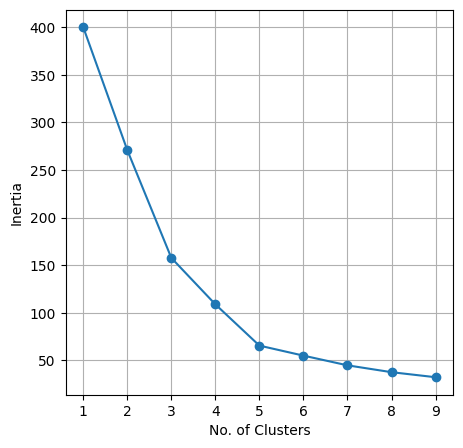

In [21]:
optKMeans(df[["TAnnual Income (k$)","TSpending Score (1-100)"]],10)

In [23]:
kmeans = KMeans(n_clusters=5)

In [24]:
kmeans.fit(df[["TAnnual Income (k$)","TSpending Score (1-100)"]])

c:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [26]:
df['kmeans_5'] = kmeans.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),TAge,TAnnual Income (k$),TSpending Score (1-100),kmeans_5
CustomerID,,,,,,,,
1,Male,19,15,39,-1.424569,-1.738999,-0.434801,4
2,Male,21,15,81,-1.281035,-1.738999,1.195704,3
3,Female,20,16,6,-1.352802,-1.700830,-1.715913,4
4,Female,23,16,77,-1.137502,-1.700830,1.040418,3
5,Female,31,17,40,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...,...,...,...,...
196,Female,35,120,79,-0.276302,2.268791,1.118061,2
197,Female,45,126,28,0.441365,2.497807,-0.861839,0
198,Male,32,126,74,-0.491602,2.497807,0.923953,2


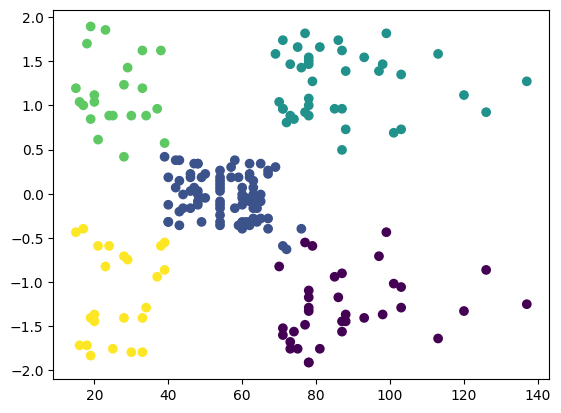

In [27]:
plt.scatter(x=df["Annual Income (k$)"], y=df["TSpending Score (1-100)"], c=df["kmeans_5"])
plt.show()